In [1]:
import pandas as pd
import numpy as np
import scipy

for i in [pd, np, scipy]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2


# 2-1 확률 개론

## 0. 데이터셋 소개

### Titanic

[Titanic](https://www.kaggle.com/competitions/titanic/data) 탑승객의 생존 유무를 담은 데이터셋 입니다.

|Data|Dictionary|Key|
|:----|:----------|:---|
|PassengerId|Passenger Id|Index|
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|Name|
|Sex|Sex|
|Age|Age in years|
|Sibsp|# of siblings / spouses aboard the Titanic|
|Parch|# of parents / children aboard the Titanic|	
|Ticket|Ticket number|
|Fare|Passenger fare|	
|Cabin|Cabin number|
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


다양한 형식의 데이터를 가지고 있으며, 여러 가지 아이디어를 생각하고 시도할 만한 요소가 많게끔 기획된 데이터셋입니다.

In [2]:
df_titanic = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Embarked의 결측치는 최빈값으로 대체합니다.
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().iloc[0])

### 확률의 기본 요소

1. 시행(Trial): 임의의 결과를 가져오는 어떤 과정

> ex) 주사위를 한 번 던지는 행위

2. 결과(Outcome): 시행을 통해 나오게 된 것

> ex) 주사위를 던져서 6이 나왔습니다.

3. 표본 공간(Sample Space): 시행에서 얻을 수 있는 가능한 모든 결과의 집합

> ex) 주사위 던지기의 표본 공간 = {1, 2, 3, 4, 5, 6}

4. 사건 (Event): 표본 공간의 부분 집합으로, 하나 이상 결과를 포함합니다. 

> ex) 짝수가 나오는 사건 = {2, 4, 6}

###  확률

어떤 사건이 일어날 가능성을 0에서 1사이의 수로 나타낸 것입니다.

> $P(A)=\frac{\text{사건 A가 발생한 수}}{\text{전체 시행의 수}}$


#### 확률의 연산

> $P(A \cap B), P(A,B)$: 사건 A와 B가 동시에 일어날 확률
>
> $P(A \cup B)$: 사건 A 또는 B가 일어난 확률: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$
>
> $P(A^c)$: 사건 A가 일어나지 않을 확률
>
> $P(A|B)$: 사건 B가 일어날 때, A가 일어날 확률: $P(A|B) = \frac{P(A \cap B)}{P(B)}=\frac{사건 A, B가 동시에 일어난 수}{사건 B가 일어난 수}$

#### 독립 사건

사건 A, B가 독립이라는 것은 하나의 사건이 다른 사건에 아무런 영향을 미치지 않는 것을 의미합니다.

A, B가 독립이라면 아래 식이 성립합니다.

> $P(A|B) = P(A)$
>
> $P(B|A) = P(B)$
>
> $P(A,B) = P(A)P(B)$

#### 조건부 독립

특정 조건이 주어졌을 때, 두 사건이 독립이 되는 것을 의미합니다.

C 조건이 주어졌을 때, A와 B가 서로 독립이 된다면, 아래 식이 성립합니다.

> $P(A|B,C) = P(A|C)$
>
> $P(B|A,C) = P(B|C)$
>
> $P(A,B|C) = P(A|C)P(B|C)$


#### 전확률의 법칙(Law of Total Probability)

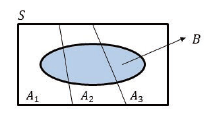

> $P(B)=P(A_1,B) + P(A_2,B) + P(A_3,B)=\sum_{i=1}^3P(A_i,B)$

### 베이즈 정리(Bayes' Theorem)

> $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

- 전확률의 법칙을 적용해봅니다.

> $P(A_i|B) = \frac{P(B|A_i)P(A_i)}{P(B)} = \frac{P(B|A_i)P(A_i)}{\sum_{\forall j}P(A_j,B)} = \frac{P(B|A_i)P(A_i)}{\sum_{\forall j}P(B|A_j)P(A_j)}$


#### 베이즈 정리의 요소

베이즈 정리를 이용하면, A 사건이 발생할 가능성을 B 사건을 통해서 구체화할 수 있습니다.

이 관점에서 베이즈 정리의 요소들을 아래와 같이 구분할 수 있습니다.

> $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

-  사전 확률(Prior): B 사건이 발생하기 전에 알려진 확률입니다. 경험을 토대로 알고 있는 A가 일어날 확률입니다. → P(A)


-  사후 확률(Posterior): B 사건이 발생한 후에 조건부로 계산되는 확률입니다. B 사건이 발생한 후에 알게 되는 A가 일어날 확률입니다. → P(A|B)


-  우도(liklihood): A 사건이 발생했을 때, B 사건이 일어났을 확률입니다. 또는 A 사건이 발생한다면, B 사건이 일어날 확률입니다.  → P(B|A)


-  증거(Evidence): B 사건이 발생할 확률. B 사건이 지니는 A 사건에 대한 영향력을 나타냅니다. → P(B)

**[Ex.1]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titanic에서 P(Survived=True) 일 확률을 구해봅니다.
    
</div>

In [4]:
num_event = len(df_titanic) # 모든 경우의 수
num_survived = len(df_titanic.loc[df_titanic['Survived'] == True]) # Survived=True 사건의 수
p_survived = num_survived / num_event
p_survived

0.3838383838383838

In [5]:
# Survived가 True인 경우는 아래와 같이 바꿀 수 있습니다. 
num_survived = (df_titanic['Survived'] == True).sum() # boolean 변수 True은 정수로는 1을 의미합니다. 
print("num_survived(1):", num_survived)
# 이를 더 줄인다면,
num_survived = df_titanic['Survived'].sum()
print("num_survived(2):", num_survived)
p_survived = num_survived / num_event
p_survived

num_survived(1): 342
num_survived(2): 342


0.3838383838383838

In [6]:
# 더욱 컴팩트하게 해봅니다.
# mean = sum / total_number 입니다.
p_survived = df_titanic['Survived'].mean()
p_survived

0.3838383838383838

**[Ex.2]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

1부터 6까지의 수가 적힌 모든 수가 동일한 확률로 나오는 정육면체 주사위 2번 던졌을 경우,

둘 중에 적어도 한 번 3의 배수가 나올 확률을 구해봅니다.
    
</div>

**[풀이]**

$X_1$: 첫 번째 주사위의 수,  $X_2$: 두 번째 주사위의 수

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

- 방법-1

 $P(X_1=\text{3의 배수} \cup X_2=\text{3의 배수)}$
 
 $= P(X_1=\text{3의 배수}) + P(X_2=\text{3의 배수}) - P(X_1=\text{3의 배수} \cap X_2=\text{3의 배수})$

 $= 1/3 + 1/3 - 1/9 = 5/9$

</div>

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

- 방법2

 $P(X_1=\text{3의 배수} \cup X_2=\text{3의 배수}) = 1 - P(X_1 \ne \text{3의 배수} \cap X_2 \ne \text{3의 배수})$

 $= 1 - 2/3 × 2/3 = 5/9$

    
</div>

**[Ex.3]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

$P(Rain) = 0.1$ 입니다, $P(우산 있음|Rain) = 0.95$, $P(우산 있음) = 0.3$ 일 때, 

$P(Rain|우산 있음)$을 구해봅니다.
    
</div>

**[풀이]**

$P(\text{Rain}|\text{우산 있음}) = \frac{P(\text{우산 있음} | \text{Rain})×P(\text{Rain})}{P(\text{우산 있음})} = \frac{0.95 × 0.1}{0.3} = 0.31666...$

------------------------------------------------------------------------------------------------

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titanic 에서 $P(Survived=True|Pclass=1)$, $P(Survived=True|Pclass=2)$, $P(Survived=True|Pclass=3)$ 을 구하세요
    
</div>

In [7]:
df_titanic.groupby('Pclass')['Survived'].sum() / df_titanic['Pclass'].value_counts()

1    0.629630
2    0.472826
3    0.242363
dtype: float64

In [8]:
df_titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titanic 에서 $P(Survived=False|Pclass=1), P(Survived=False|Pclass=2), P(Survived=False|Pclass=3)$ 을 구하세요
    
</div>

In [9]:
1 - df_titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.370370
2    0.527174
3    0.757637
Name: Survived, dtype: float64

**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titaninc 에서, $P(Survived=True|Pclass, Sex, Embarked)$ 를 Pclass, Sex, Embarked 의 모든 표본 공간(사건 공간)에 대한 확률을 구해봅니다.

구하는 방법은,

Survived가 조건으로 주어진다면 Pclass, Sex 그리고 Embarked는 서로 독립임을 가정합니다.
    
그리고, 선박 사고가 났을 경우 알려진 생존, 즉 사전 확률은 P(Survived) = 0.4 로 알려져 있습니다.
    
Bayes Theorem을 이용합니다.

> $P(A_i|B) = \frac{P(B|A_i)P(A_i)}{\sum_{\forall j}P(B|A_j)P(A_j)}$

</div>

$P(Survived=True|Pclass, Sex, Embarked) = \frac{P(Pclass, Sex, Embarked|Survived=True)P(Survived=True)}{P(Pclass, Sex, Embarked|Survived=True)P(Survived=True) + P(Pclass, Sex, Embarked|Survived=False)P(Survived=False)}$

위 식을 정리해봅니다.

$P(Pclass, Sex, Embarked, Survived=True)$

Chain Rule에 의해,

$= P(Pclass | Sex, Embarked, Survived=True) P(Sex|Embarked, Survived=True) P(Embarked|Survived=True) P(Survived=True)$

Pclass와  Sex, Embarked가 Survived에 대하여 조건부 독립임을 이용하면, 

 $= P(Pclass | Survived=True) P(Sex|Survived=True) P(Embarked|Survived=True) P(Survived=True)$
  
P(Survived=True)를 좌항으로 이항하면

$P(Pclass, Sex, Embarked|Survived=True) $

$= P(Pclass | Survived=True) P(Sex|Survived=True) P(Embarked|Survived=True)$

로 정리됩니다.

마찬가지로,

$P(Pclass, Sex, Embarked|Survived=False) $

$= P(Pclass|Survived=False) P(Sex|Survived=False) P(Embarked|Survived=False)$

가 됩니다.

In [10]:
# Survived에 대한 조건부 확률을 구합니다.
df_pclass_prob = pd.crosstab(index=df_titanic['Pclass'], columns=df_titanic['Survived'],normalize='columns')
df_sex_prob = pd.crosstab(index=df_titanic['Sex'], columns=df_titanic['Survived'],normalize='columns')
df_embarked_prob = pd.crosstab(index=df_titanic['Embarked'], columns=df_titanic['Survived'],normalize='columns')

In [11]:
display(df_pclass_prob)
display(df_sex_prob)
display(df_embarked_prob)

Survived,0,1
Pclass,,
1,0.145719,0.397661
2,0.176685,0.254386
3,0.677596,0.347953


Survived,0,1
Sex,,
female,0.147541,0.681287
male,0.852459,0.318713


Survived,0,1
Embarked,,
C,0.136612,0.271930
Q,0.085610,0.087719
S,0.777778,0.640351


In [12]:
import itertools
# 가능한 itertools.product는 주어진 리스트들의 모든 경우의 수를 구해줍니다.
df_prob = pd.DataFrame(
    [(Pclass, Sex, Embarked) for Pclass, Sex, Embarked in itertools.product(
        df_pclass_prob.index, df_sex_prob.index, df_embarked_prob.index
    )],
    columns=['Pclass', 'Sex', 'Embarked']
)
df_prob

,Pclass,Sex,Embarked
0,1,female,C
1,1,female,Q
2,1,female,S
3,1,male,C
4,1,male,Q
5,1,male,S
6,2,female,C
7,2,female,Q
8,2,female,S
9,2,male,C


In [16]:
def calc_liklihood(x, survived):
    """
    survived 조건에서 대해서 x에 해당하는 경우의 우도(liklihood)를 계산합니다.
    Parameters
        x: DataFrame
            경우의 수를 나타내는 데이터프레임
        survived: int
            0: survived 1: not survived
    Returns
        float
            P(Pclass=x['Pclass']|Survived=survived)×P(Sex=x['Sex']|Survived=survived)×P(Pclass=x['Embarked']|Survived=survived)
    """
    return x['Pclass'].map(df_pclass_prob[survived]) * \
            x['Sex'].map(df_sex_prob[survived]) * \
            x['Embarked'].map(df_embarked_prob[survived])
prior = 0.4 # 사전 확률은 0,4로 주어졌습니다.
df_prob.assign(
    liklihood=lambda x: calc_liklihood(x, 1), # 우도(liklihood)를 계산합니다.
    evidence=lambda x:calc_liklihood(x, 0) * (1 - prior) + \
                    calc_liklihood(x, 1) * prior # 전확률 법칙을 이용한 증거를 계산합니다.
).assign(
    posterior=lambda x: x['liklihood'] * prior / x['evidence']
)

,Pclass,Sex,Embarked,liklihood,evidence,posterior
0,1,female,C,0.073671,0.031231,0.943573
1,1,female,Q,0.023765,0.010610,0.895918
2,1,female,S,0.173484,0.079427,0.873681
3,1,male,C,0.034464,0.023968,0.575180
4,1,male,Q,0.011118,0.010828,0.410707
5,1,male,S,0.081158,0.090432,0.358977
6,2,female,C,0.047128,0.020988,0.898192
7,2,female,Q,0.015203,0.007420,0.819540
8,2,female,S,0.110979,0.056557,0.784903
9,2,male,C,0.022047,0.021164,0.416681
